# Anton Paar Litesizer 500 Analysis
This notebook shows how to read all the information from the data file exported by the Anton Paar Litesizer 500 Particle Size Analyzer software using the class ``Litesizer500``

In [21]:
# Import Libraries
%load_ext autoreload
%autoreload

import matplotlib.pyplot as plt
import seaborn as sns

from litesizer_500 import Litesizer500

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
litesizer500_data_filename = ".\data\Litesizer 500 Test Data.xlsx"

In [23]:
ls500 = Litesizer500(litesizer500_data_filename)

## Sample Information

In [24]:
print(f"Workbook name is: {ls500.workbook_name}")
print(f"Measuremennt name is: {ls500.measurement_name}")
print(f"Measurement mode is: {ls500.measurement_mode}")
print(f"Comment is: {ls500.comment}")

Workbook name is: D:\test.apkw
Measuremennt name is: test
Measurement mode is: Particle size
Comment is: xyz material


## Results

In [25]:
print(f"Hydrodynamic diameter is: {ls500.hydrodynamic_diameter}")
print(f"Polydispersity index is: {ls500.polydispersity_index}")
print(f"Intercept g1² is: {ls500.intercept_g12}")
print(f"Baseline is: {ls500.baseline}")
print(f"Mean Intensity is: {ls500.mean_intensity}")
print(f"Absolute Intensity is: {ls500.absolute_intensity}")
print(f"Fit error is: {ls500.fit_error}")
print(f"Diffusion coefficient is: {ls500.diffusion_coefficient}")

Hydrodynamic diameter is: 322.889554242357
Polydispersity index is: 20.5969269645732
Intercept g1² is: 0.837716923466933
Baseline is: 0.999902979333188
Mean Intensity is: 306.498653198653
Absolute Intensity is: 2675569.01258967
Fit error is: 2.21345180797377e-05
Diffusion coefficient is: 1.51933131506751


In [26]:
pos_dp = ls500.get_positions_of_value(ls500.df, "Particle diameter")
print(pos_dp)

pos_rel_freq = ls500.get_positions_of_value(ls500.df, "Relative frequency")
print(pos_rel_freq)

pos_under = ls500.get_positions_of_value(ls500.df, "Undersize")
print(pos_under)

pos_vol_w = ls500.get_positions_of_value(ls500.df, "Volume weighted")
print(pos_vol_w)

[(5, 5)]
[(5, 6), (5, 7), (5, 8)]
[(5, 9), (5, 10), (5, 11)]
[(6, 7), (6, 10)]


In [27]:
df_vol_w = ls500.df.iloc[:, [pos_dp[0][1], pos_vol_w[0][1], pos_vol_w[1][1]]]
df_vol_w.dropna(how="all").dtypes

5     object
7     object
10    object
dtype: object

In [28]:
pos_vol_w[0][1]

7

## Particle Size Distribution: Intensity Weighted

In [29]:
ls500.df_psd_intensity_weighted

,Particle Diameter (nm),Relative Frequency (%),Cumulative Undersize (%)
0,0.209474,0,0
1,0.227147,0,0
2,0.24631,0,0
3,0.26709,0,0
4,0.289624,0,0
...,...,...,...
137,13811.02704,0,100
138,14976.207715,0,100
139,16239.689986,0,100
140,17609.767163,0,100


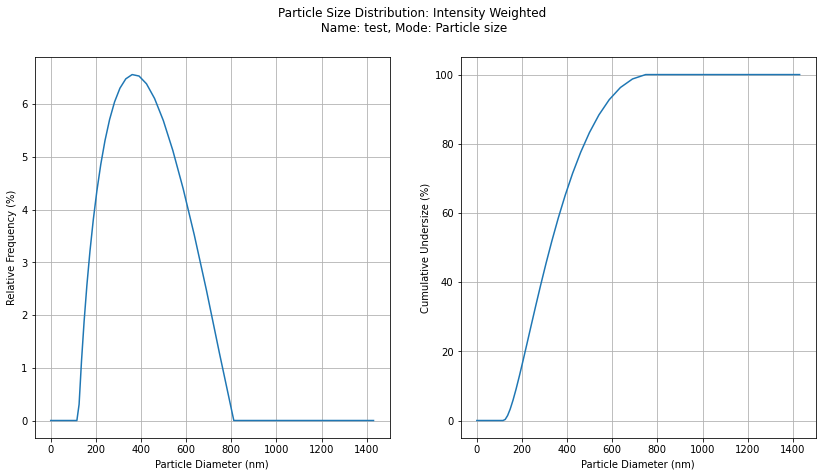

In [30]:
df_psd = ls500.df_psd_intensity_weighted.copy()
df_psd = df_psd[df_psd["Particle Diameter (nm)"] <= 1500]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.lineplot(x="Particle Diameter (nm)", y="Relative Frequency (%)", data=df_psd, ax=axes[0])
axes[0].grid(visible=True)

sns.lineplot(x="Particle Diameter (nm)", y="Cumulative Undersize (%)", data=df_psd, ax=axes[1])
axes[1].grid(visible=True)

plt.suptitle(f"Particle Size Distribution: Intensity Weighted\n Name: {ls500.measurement_name}, Mode: {ls500.measurement_mode}")
plt.show()

## Particle Size Distribution: Volume Weighted

In [31]:
ls500.df_psd_volume_weighted

,Particle Diameter (nm),Relative Frequency (%),Cumulative Undersize (%)
0,0.209474,0,0
1,0.227147,0,0
2,0.24631,0,0
3,0.26709,0,0
4,0.289624,0,0
...,...,...,...
137,13811.02704,0,100
138,14976.207715,0,100
139,16239.689986,0,100
140,17609.767163,0,100


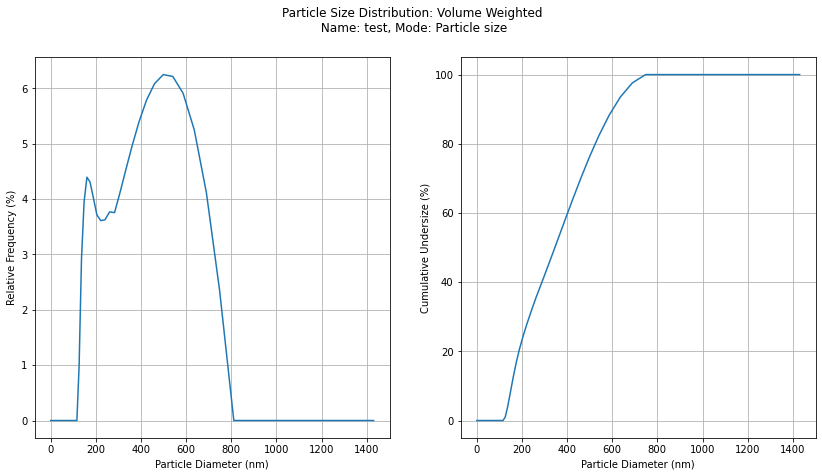

In [32]:
df_psd = ls500.df_psd_volume_weighted.copy()
df_psd = df_psd[df_psd["Particle Diameter (nm)"] <= 1500]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.lineplot(x="Particle Diameter (nm)", y="Relative Frequency (%)", data=df_psd, ax=axes[0])
axes[0].grid(visible=True)

sns.lineplot(x="Particle Diameter (nm)", y="Cumulative Undersize (%)", data=df_psd, ax=axes[1])
axes[1].grid(visible=True)

plt.suptitle(f"Particle Size Distribution: Volume Weighted\n Name: {ls500.measurement_name}, Mode: {ls500.measurement_mode}")
plt.show()

## Particle Size Distribution: Number Weighted

In [33]:
ls500.df_psd_number_weighted

,Particle Diameter (nm),Relative Frequency (%),Cumulative Undersize (%)
0,0.209474,0,0
1,0.227147,0,0
2,0.24631,0,0
3,0.26709,0,0
4,0.289624,0,0
...,...,...,...
137,13811.02704,0,100
138,14976.207715,0,100
139,16239.689986,0,100
140,17609.767163,0,100


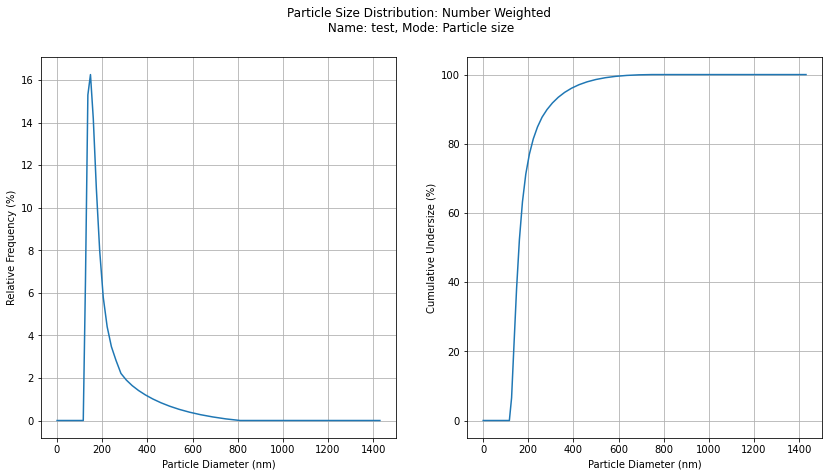

In [35]:
df_psd = ls500.df_psd_number_weighted.copy()
df_psd = df_psd[df_psd["Particle Diameter (nm)"] <= 1500]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.lineplot(x="Particle Diameter (nm)", y="Relative Frequency (%)", data=df_psd, ax=axes[0])
axes[0].grid(visible=True)

sns.lineplot(x="Particle Diameter (nm)", y="Cumulative Undersize (%)", data=df_psd, ax=axes[1])
axes[1].grid(visible=True)

plt.suptitle(f"Particle Size Distribution: Number Weighted\n Name: {ls500.measurement_name}, Mode: {ls500.measurement_mode}")
plt.show()

## Peak Analysis - Volume

## Peak Analysis - Intensity

## Peak Analysis - Number

## D values

## Automatic Values

## Size Distribution Function

## Correlation Function

## Intensity Trace